In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv(r"C:\Users\ASUS\Desktop\intern exercise\Customertravel(tour&travel customer chrun prediction).csv")

In [4]:
df.head(2)

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,No,Middle Income,6,No,Yes,0
1,34,Yes,Low Income,5,Yes,No,1


In [5]:
df.describe()

,Age,ServicesOpted,Target
count,954.000000,954.000000,954.000000
mean,32.109015,2.437107,0.234801
std,3.337388,1.606233,0.424097
min,27.000000,1.000000,0.000000
25%,30.000000,1.000000,0.000000
50%,31.000000,2.000000,0.000000
75%,35.000000,4.000000,0.000000
max,38.000000,6.000000,1.000000


In [6]:
df.shape

(954, 7)

There are 954 rows and 7 columns are there in this dataset



In [7]:
#check the null values
df.isnull().sum()

Age                           0
FrequentFlyer                 0
AnnualIncomeClass             0
ServicesOpted                 0
AccountSyncedToSocialMedia    0
BookedHotelOrNot              0
Target                        0
dtype: int64

In [8]:
df.columns

Index(['Age', 'FrequentFlyer', 'AnnualIncomeClass', 'ServicesOpted',
       'AccountSyncedToSocialMedia', 'BookedHotelOrNot', 'Target'],
      dtype='object')

In [9]:
from ydata_profiling import ProfileReport

In [10]:
pf=ProfileReport(df)
pf

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
df['FrequentFlyer']=df['FrequentFlyer'].replace('No Record',np.NaN)

In [12]:
df['FrequentFlyer'].isnull().sum()

60

In [13]:
df.to_csv('anto.csv',index=False)

In [14]:
import os

In [15]:
os.getcwd()

'C:\\Users\\ASUS'

In [16]:
group=df.groupby('Age')['FrequentFlyer'].agg(lambda x:x.mode()[0])

In [17]:
print(group)

Age
27    No
28    No
29    No
30    No
31    No
33    No
34    No
35    No
36    No
37    No
38    No
Name: FrequentFlyer, dtype: object


In [18]:
df['FrequentFlyer']=df['FrequentFlyer'].replace(np.nan,'No')

In [19]:
df.isnull().sum()

Age                           0
FrequentFlyer                 0
AnnualIncomeClass             0
ServicesOpted                 0
AccountSyncedToSocialMedia    0
BookedHotelOrNot              0
Target                        0
dtype: int64

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
model=LabelEncoder()

In [22]:
df['FrequentFlyer']=model.fit_transform(df['FrequentFlyer'])

In [23]:
df.head()

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,0,Middle Income,6,No,Yes,0
1,34,1,Low Income,5,Yes,No,1
2,37,0,Middle Income,3,Yes,No,0
3,30,0,Middle Income,2,No,No,0
4,30,0,Low Income,1,No,No,0


In [24]:
df['AnnualIncomeClass']=model.fit_transform(df['AnnualIncomeClass'])

In [25]:
df.head()

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,0,2,6,No,Yes,0
1,34,1,1,5,Yes,No,1
2,37,0,2,3,Yes,No,0
3,30,0,2,2,No,No,0
4,30,0,1,1,No,No,0


In [26]:
df['BookedHotelOrNot']=model.fit_transform(df['BookedHotelOrNot'])

In [27]:
df.head()

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,0,2,6,No,1,0
1,34,1,1,5,Yes,0,1
2,37,0,2,3,Yes,0,0
3,30,0,2,2,No,0,0
4,30,0,1,1,No,0,0


In [28]:
df['AccountSyncedToSocialMedia']=model.fit_transform(df['AccountSyncedToSocialMedia'])

In [29]:
df.head()

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,0,2,6,0,1,0
1,34,1,1,5,1,0,1
2,37,0,2,3,1,0,0
3,30,0,2,2,0,0,0
4,30,0,1,1,0,0,0


In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x=df.drop(['Target'],axis=1)
y=df['Target']

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
rf=RandomForestClassifier()

In [35]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [36]:
prediction=rf.predict(x_test)

In [37]:
from sklearn.metrics import accuracy_score

In [38]:
print(accuracy_score(y_test,prediction))

0.8702928870292888


In [39]:
df.corr()['Target'].apply(abs).sort_values(ascending=False)

Target                        1.000000
FrequentFlyer                 0.430973
AnnualIncomeClass             0.418092
BookedHotelOrNot              0.206055
Age                           0.131534
AccountSyncedToSocialMedia    0.073831
ServicesOpted                 0.038646
Name: Target, dtype: float64

In [40]:
f=rf.feature_importances_
f

array([0.29794199, 0.15633702, 0.15259172, 0.25271136, 0.08835746,
       0.05206045])

In [41]:
fm=pd.DataFrame({'Feature':x.columns,'Importances':f}).sort_values(by='Importances',ascending=False)
fm

,Feature,Importances
0,Age,0.297942
3,ServicesOpted,0.252711
1,FrequentFlyer,0.156337
2,AnnualIncomeClass,0.152592
4,AccountSyncedToSocialMedia,0.088357
5,BookedHotelOrNot,0.052060


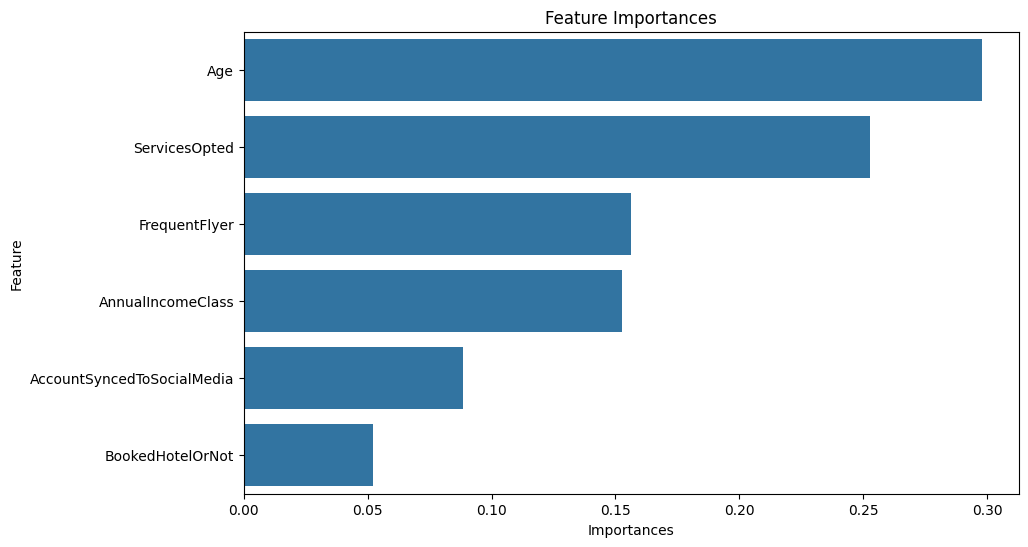

In [42]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importances', y='Feature', data=fm)
plt.title('Feature Importances')
plt.show()

In [43]:
age_summary = df.groupby('Target')['Age'].describe()
print("Age summary statistics by churn status:")
print(age_summary)

Age summary statistics by churn status:
        count       mean       std   min   25%   50%   75%   max
Target                                                          
0       730.0  32.352055  3.209323  27.0  30.0  31.0  35.0  38.0
1       224.0  31.316964  3.620133  27.0  28.0  30.0  35.0  38.0


In [44]:
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 20, 30, 40, 50, 60, 100], labels=['0-20', '21-30', '31-40', '41-50', '51-60', '60+'])
chrun_by_age=df.groupby("AgeGroup")['Target'].mean().sort_values(ascending=False)
print("\
Churn rate by age group:")
print(chrun_by_age)

Churn rate by age group:
AgeGroup
21-30    0.277904
31-40    0.198058
0-20          NaN
41-50         NaN
51-60         NaN
60+           NaN
Name: Target, dtype: float64


C:\Users\ASUS\AppData\Local\Temp\ipykernel_10388\733647162.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  chrun_by_age=df.groupby("AgeGroup")['Target'].mean().sort_values(ascending=False)


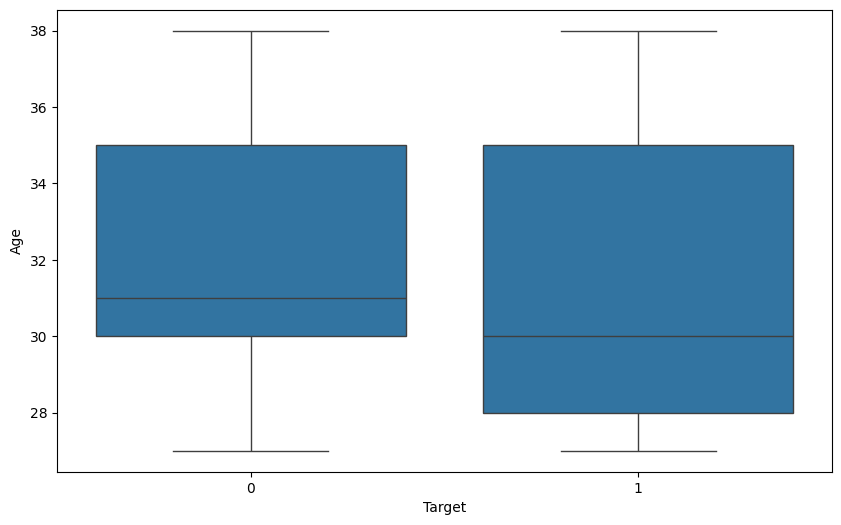

In [45]:
#Target vs Age
plt.figure(figsize=(10,6))
sns.boxplot(x=df['Target'],y=df['Age'],data=df)
plt.show()

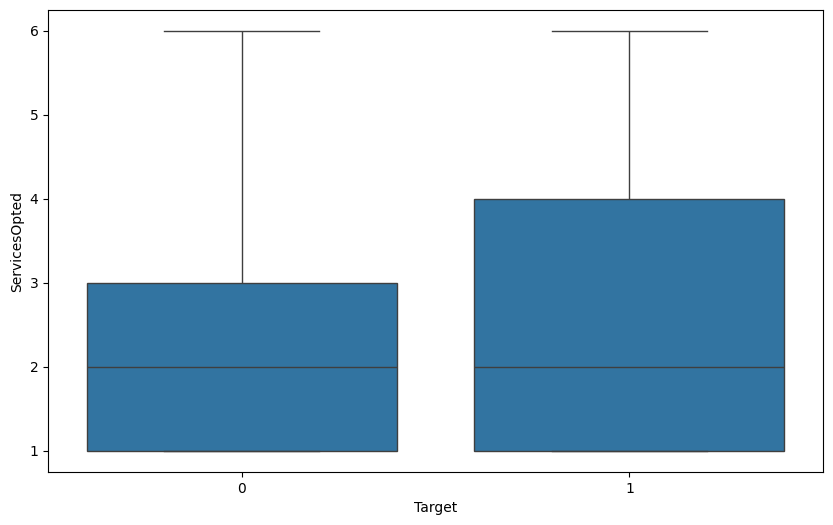

In [46]:
#Target vs serviceopted 
plt.figure(figsize=(10,6))
sns.boxplot(x=df['Target'],y=df['ServicesOpted'],data=df)
plt.show()

In [47]:
services_summary = df.groupby('Target')['ServicesOpted'].describe()
print("\
Services summary statistics by churn status:")
print(services_summary)

Services summary statistics by churn status:
        count      mean       std  min  25%  50%  75%  max
Target                                                    
0       730.0  2.402740  1.554495  1.0  1.0  2.0  3.0  6.0
1       224.0  2.549107  1.763430  1.0  1.0  2.0  4.0  6.0


In [48]:
average_services_opted = df.groupby('Target')['ServicesOpted'].mean()
print("\
Average number of services opted by churn status:")
print(average_services_opted)

Average number of services opted by churn status:
Target
0    2.402740
1    2.549107
Name: ServicesOpted, dtype: float64


In [49]:
#chrun rate by income:
churn_rate_by_income = df.groupby('AnnualIncomeClass')['Target'].mean().sort_index()
churn_rate_by_income

AnnualIncomeClass
0    0.578616
1    0.269430
2    0.068460
Name: Target, dtype: float64

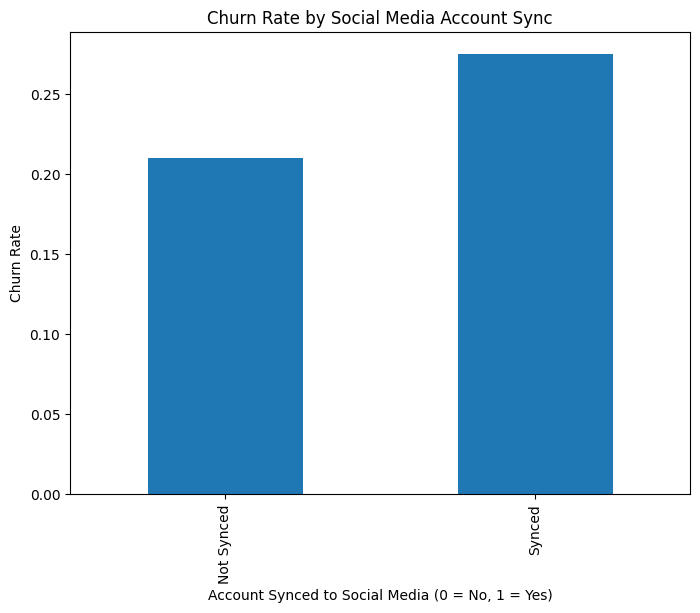

In [50]:
# Analyze the impact of Account Synced to Social Media on churn
social_media_churn = df.groupby('AccountSyncedToSocialMedia')['Target'].mean()
plt.figure(figsize=(8, 6))
social_media_churn.plot(kind='bar')
plt.title('Churn Rate by Social Media Account Sync')
plt.xlabel('Account Synced to Social Media (0 = No, 1 = Yes)')
plt.ylabel('Churn Rate')
plt.xticks([0, 1], ['Not Synced', 'Synced'])
plt.show()



Churn rate by hotel booking status:
BookedHotelOrNot
0    0.305556
1    0.126984
Name: Target, dtype: float64


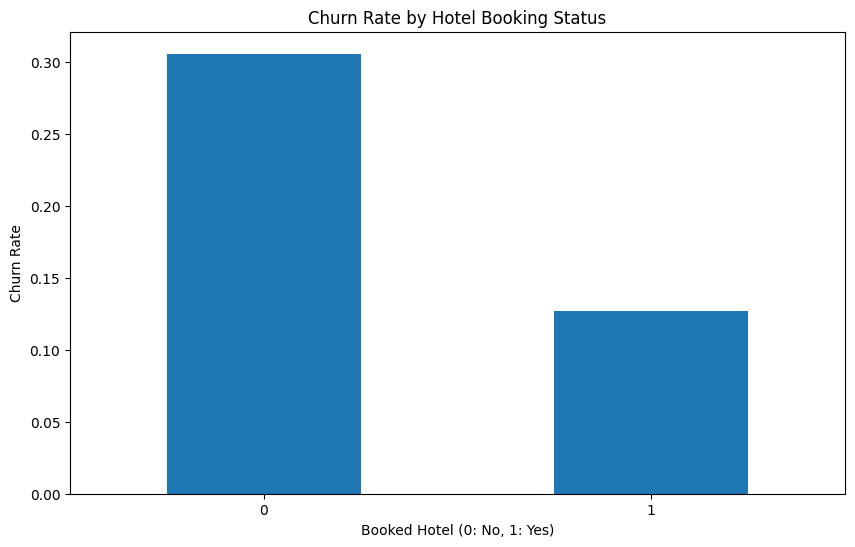

In [51]:
# Calculate churn rate by hotel booking status
churn_rate = df.groupby('BookedHotelOrNot')['Target'].mean()
print("Churn rate by hotel booking status:")
print(churn_rate)

# Create a bar plot
plt.figure(figsize=(10, 6))
churn_rate.plot(kind='bar')
plt.title('Churn Rate by Hotel Booking Status')
plt.xlabel('Booked Hotel (0: No, 1: Yes)')
plt.ylabel('Churn Rate')
plt.xticks(rotation=0)
plt.show()

## Analysis for Tour & Travel Customer Chrun Prediction.
- **Age:** The Age from 21-30 they are mostly like to chrun.The **Age From 31-40** has low chrun rate compared to young people so you must focus on the  **Young people**
  
- **Service opted:** The people who are all having high serive opted they are most like to chrun.**So** By providing best offers and gifts to them it can reduce the chrun rate..
   The person who has high income has more service so the attract them give some **premium packages**
  
 - **Frequent flyer has high chrun rate**
   
 - **Income:** The person who has lower income they has high chrun rate so by Providing cheap and best price offers it can reduce the chrun rate.

 - **Hotel booking:** The customers who didnt book the hotel they are chruning so Providing best facilities and privacy you can reduce the chrun.

